https://github.com/ktreider/CS260





In [ ]:
# imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
plt.style.use('fivethirtyeight') #A helpful style package
import plotly.graph_objects as go
import seaborn as sns

---
#### CS 260 Final Project - Spring 2022
---

# Touching the Peak ⛰️

### By: Katie Reider & Harkiran Bhullar


---

## 1. Introduction

For this project we decided to look at climbing expeditions. There can be a lot of data behind mountains and their hikers, so we took a look at a couple datasets from expeditions in the Himalayas. Exploring the data, we decided to look into the factors of a hike and the successfulness of said hikes.

Our overarching questions was to answer: **What factors lead to a successful climbing expedition?** 

It turns out, this question is harder to answer than one might think. We found that there is no specific way to look at the dataset that has a strong enough correlation to point to a specific factor for a more successful expedition. Factors that might have decided the successfulness of a hike like age or termination reason turned out to have no conclusive results. Hikers almost 80 years old had successful hikes!

Here are the questions we dove into trying to answer this overarching question of successfulness: 
* Which injury type was most prominent?
<br><br>
* **Were those that were injured on their expedition younger or older than the uninjured?**
<br><br>
* Do member deaths or hired staff deaths correlate to any specific trekking agency?
<br><br>
* Did member deaths increase/decrase if there were hired staff on the expedition?
<br><br>
* Were there more successful termination reason in a particular season?
<br><br>
*  **Did more men or women successfully climb a peak?**
<br><br>
* How do the ages of hikers change over the years? Are there older hikers climbing more now or in the past?
<br><br>
* Which peaks had the highest success rate?
<br><br>
* Is there a correlation between the height of peaks and climbing status?

---
---

## 2. Data

A direct link to the data on these climbing expeditions can be found at the following websites:
 * https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-09-22
 * https://www.himalayandatabase.com/
 
According to the Himalayan database website, the database is "a compilation of records for all expeditions that have climbed in  Nepal Himalaya." The data is gathered from books, alpine journals, and correspondence with Himalayan climbers. The data below covers expeditions from 1905 through early 2020, but the Himalayan Database continually updates.

In [ ]:
url = "https://raw.githubusercontent.com/ktreider/CS260/main/expeditions.csv"
expeditions = pd.read_csv(url)
expeditions.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN


In [ ]:
url2 = "https://raw.githubusercontent.com/ktreider/CS260/main/members.csv"
members = pd.read_csv(url2)
members.head()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
url3 = "https://raw.githubusercontent.com/ktreider/CS260/main/peaks.csv"
peaks = pd.read_csv(url3)
peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


In [ ]:
#merged tables 
merge1 =  expeditions.merge(members, how="left", on=['expedition_id', 'peak_id', 'peak_name', 'year', 'season', 'highpoint_metres', 'oxygen_used'])
merge1.columns

total_climbs = peaks.merge(merge1, how="left", left_on=['first_ascent_expedition_id', 'peak_name', 'peak_id'], right_on=['expedition_id', 'peak_name', 'peak_id'])
total_climbs.columns

Index(['peak_id', 'peak_name', 'peak_alternative_name', 'height_metres',
       'climbing_status', 'first_ascent_year', 'first_ascent_country',
       'first_ascent_expedition_id', 'expedition_id', 'year', 'season',
       'basecamp_date', 'highpoint_date', 'termination_date',
       'termination_reason', 'highpoint_metres', 'members', 'member_deaths',
       'hired_staff', 'hired_staff_deaths', 'oxygen_used', 'trekking_agency',
       'member_id', 'sex', 'age', 'citizenship', 'expedition_role', 'hired',
       'success', 'solo', 'died', 'death_cause', 'death_height_metres',
       'injured', 'injury_type', 'injury_height_metres'],
      dtype='object')

---
---
### Variables Explained

Below is a list of each variable in the dataset and its explanation.
#### TABLE: EXPEDITIONS 
| variable           | class     | description                                                  |
| :----------------- | :-------- | :----------------------------------------------------------- |
| expedition_id      | character | Unique identifier for expedition. Can be linked to `peaks` or `members` tables. |
| peak_id            | character | Unique identifier for peak. Can be linked to `peaks` table.  |
| peak_name          | character | Common name for peak                                         |
| year               | double    | Year of expedition (1960 - 2019)                                           |
| season             | character | Season of expedition (Spring, Summer, Winter, Autumn)                  |
| basecamp_date      | date      | Date of expedition arrival at basecamp                       |
| highpoint_date        | date      | Date of expedition summiting the peak for the first time or, if peak wasn't reached, date of reaching its highpoint |
| termination_date   | date      | Date the expedition was terminated                           |
| termination_reason | character | Primary reason the expedition was terminated. There are two possibilities for a successful expeditions, depending on whether the main peak or a sub-peak was summitted. (0-unknown, 1-success main peak, 2-success subpeak, 3-success claimed, 4-bad weather from storms, high winds, 5-bad conditions from deep snow, avalanching, falling ice, or rock, 6-accident like death or serious injury, 7- illness, ams, exhaustion, or frostbite, 8- lack of supplies of equipment, 9-lack of time, 10- route technically too difficult, lack of experience, strenght or motivation, 11-did not reach base camp, 12-did not attempt climb, 13-attempt rumoured, 14-other) |
| highpoint_metres   | double    | Elevation highpoint of the expedition                        |
| members            | double    | Number of expedition members. For expeditions in Nepal, this is usually the number of foreigners listed on the expedition permit. For expeditions in China, this is usually the number of non-hired members. |
| member_deaths      | double    | Number of expeditions members who died                       |
| hired_staff        | double    | Number of hired staff who went above basecamp                |
| hired_staff_deaths | double    | Number of hired staff who died                               |
| oxygen_used        | logical   | Whether oxygen was used by at least one member of the expedition (TRUE or FALSE) |
| trekking_agency    | character | Name of the trekking agency                                  |


#### TABLE: MEMBERS
| variable             | class     | description                                                  |
| :------------------- | :-------- | :----------------------------------------------------------- |
| expedition_id        | character | Unique identifier for expedition. Can be linked to `peaks` or `members` tables. |
| member_id            | character | Unique identifier for the person. This is *not* consistent across expeditions, so you cannot use a single `member_id` to look up all expeditions a person was part of. |
| peak_id              | character | Unique identifier for peak. Can be linked to `peaks` table.  |
| peak_name            | character | Common name for peak                                         |
| year                 | double    | Year of expedition (1978 - 2019)                                          |
| season               | character | Season of expedition (Spring, Summer, Winter, Autumn)                  |
| sex                  | character | Sex of the person (M or F)                                          |
| age                  | double    | Age of the person. Depending on the best available data, this could be as of the summit date, the date of death, or the date of arrival at basecamp. |
| citizenship          | character | Citizenship of the person                                    |
| expedition_role      | character | Role of the person on the expedition (Leader, Climber, Kayaker, etc.)                        |
| hired                | logical   | Whether the person was hired by the expedition (TRUE or FALSE)               |
| highpoint_metres     | double    | Elevation highpoint of the person                            |
| success              | logical   | Whether the person was successful in summitting a main peak or sub-peak, depending on the goal of expedition (TRUE or FALSE) |
| solo                 | logical   | Whether the person attempted a solo ascent                   |
| oxygen_used          | logical   | Whether the person used oxygen (TRUE or FALSE)                              |
| died                 | logical   | Whether the person died TRUE or FALSE)                                      |
| death_cause          | character | Primary cause of death (0-unspecified, 1-AMS, 2-exhaustion, 3-exposure or frostbite, 4-fall, 5-crevasse, 6-icefall collapse, 7-avalanche, 8-falling rock or ice, 9-disappearance (unexplained), 10-illness (non-AMS), 11-other, 12-unknown)                                      |
| death_height_metres  | double    | Height at which the person died                              |
| injured              | logical   | Whether the person was injured TRUE or FALSE)                              |
| injury_type          | character | Primary cause of injury (0-unspecified, 1-AMS, 2-exhaustion, 3-exposure or frostbite, 4-fall, 5-crevasse, 6-icefall collapse, 7-avalanche, 8-falling rock or ice, 9-disappearance (unexplained), 10-illness (non-AMS), 11-other, 12-unknown)                                      |
| injury_height_metres | double    | Height at which the injury occurred                          |

#### TABLE: PEAKS
| variable                   | class     | description                                                  |
| :------------------------- | :-------- | :----------------------------------------------------------- |
| peak_id                    | character | Unique identifier for peak                                   |
| peak_name                  | character | Common name of peak                                          |
| peak_alternative_name      | character | Alternative name of peak (for example, the "Mount Everest" is "Sagarmatha" in Nepalese) |
| height_metres              | double    | Height of peak in metres                                     |
| climbing_status            | character | Whether the peak has been climbed (Climbed or Unclimbed)                            |
| first_ascent_year          | double    | Year of first successful ascent, if applicable               |
| first_ascent_country       | character | Country name(s) of expedition members part of the first ascent. Can have multiple values if members were from different countries. Country name is as of date of ascent (for example, "W Germany" for ascents before 1990). |
| first_ascent_expedition_id | character | Unique identifier for expedition. Can be linked to `expeditions` or `members` tables. |

<br><br>
---
---
## 3. Results

*To start our research, we looked at the leading injuries that resulted in unsuccessful climbs. We used a word cloud to help visualize our data.*

---
##### **Which injury type was most prominent?**

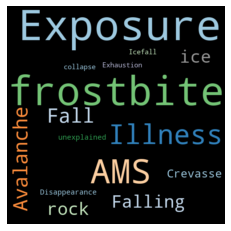

In [ ]:
from wordcloud import WordCloud
# Create list of words
dp = members.injury_type.dropna()
text = ' '.join(dp.tolist())
text = text.replace("(non-AMS)","")

#print(text)

# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, margin=0, collocations=False, colormap='tab20c').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() #AMS is altitude sickness

*Here is a word cloud of the different types of injuries. More prevalent injuries are larger, with more emphasis. In this case, AMS (Altitude sickness) and frostbite/exposure were the top reasons listed for injury types. Runner ups include illness and avalanches. But this image does not tell us anything else.* 

*We then decided to look into any correlations between injury and the age of hikers. Our main question was should hikers avoid these expeditions if they are older? Will you have a more successful group with a bunch of young people in their 20s?*

---
##### **Were those that were injured on their expedition younger or older than the uninjured?**

In [ ]:
not_injured = members[members.injured == False]
injured = members[members.injured == True]

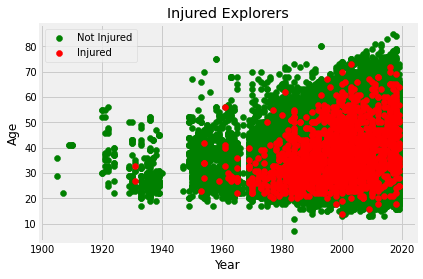

In [ ]:
plt.scatter(not_injured.year, not_injured.age, color="green", label="Not Injured")
plt.scatter(injured.year, injured.age, color="red", label="Injured")
plt.legend(loc=2)
plt.title("Injured Explorers")
plt.xlabel('Year')
plt.ylabel('Age');

In [ ]:
not_injured.age.mean()

37.332221770747225

In [ ]:
injured.age.mean()

37.42398546335554

*From this exploration, there does not seem to be a difference in age depending on whether the person was injured or not. The injured age mean is only ~0.1 higher than that of the non-injured. The thought process is that there might be more injuries if the hiker is older. But this does not seem to be the case. This might be explained based on the type of injury (see below).*

In [ ]:
injured.injury_type.value_counts()

Exposure / frostbite           599
AMS                            415
Illness (non-AMS)              257
Fall                           117
Avalanche                      114
Falling rock / ice              88
Other                           75
Crevasse                        25
Disappearance (unexplained)      8
Icefall collapse                 7
Exhaustion                       7
Name: injury_type, dtype: int64

*Next, we took a turn, and instead of injuries, we looked at deaths on the treacherous hikes. Specifically, member and hired staff deaths. We wanted to see if hiking with a specific trekking agency might guarantee better success since their staff might protect their hikers more (aka more cautious)? To start, we looked at the percentage of member and staff deaths each agency has to see any trends.*

---
##### **Do member deaths or hired staff deaths correlate to any specific trekking agency?**


In [ ]:
member_deaths = expeditions[(expeditions["member_deaths"] > 0)]
member_deaths.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
5,ANN280101,ANN2,Annapurna II,1980,Spring,1980-03-25,1980-04-24,1980-05-01,Accident (death or serious injury),7000.0,6,1,2,0,False,NaN
8,ANN281301,ANN2,Annapurna II,1981,Autumn,1981-09-04,1981-10-11,1981-10-17,Accident (death or serious injury),7400.0,9,1,3,0,False,NaN
10,ANN283101,ANN2,Annapurna II,1983,Spring,1983-04-11,1983-05-05,NaN,Accident (death or serious injury),7450.0,5,1,0,0,False,NaN
66,KANG88103,KANG,Kangchenjunga,1988,Spring,1988-03-24,1988-04-15,1988-05-15,"Route technically too difficult, lack of exper...",8450.0,23,1,9,0,True,Lamjung
69,AMAD88102,AMAD,Ama Dablam,1988,Spring,1988-03-23,1988-04-15,1988-04-17,"Bad conditions (deep snow, avalanching, fallin...",6520.0,6,1,0,0,False,Mountain Travel


In [ ]:
staff_deaths = expeditions[(expeditions["hired_staff_deaths"] > 0) & (expeditions["trekking_agency"] != "Sea to Summit Trekking")] # Remove weird outlier (agency has 6 deaths but only hired 3)
staff_deaths.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
42,ANN485301,ANN4,Annapurna IV,1985,Autumn,1985-10-05,1985-10-06,1985-10-25,"Bad conditions (deep snow, avalanching, fallin...",5000.0,15,0,0,1,False,NaN
107,EVER88401,EVER,Everest,1988,Winter,1988-11-10,1988-12-22,NaN,Accident (death or serious injury),8700.0,17,0,10,1,True,Mountain Travel
126,ANN183301,ANN1,Annapurna I,1983,Autumn,1983-08-31,1983-09-11,NaN,Accident (death or serious injury),6700.0,9,1,4,2,False,NaN
136,KTEG83301,KTEG,Kangtega,1983,Autumn,1983-10-04,1983-10-18,1983-10-24,"Route technically too difficult, lack of exper...",6250.0,6,0,4,1,False,NaN
206,MANA85303,MANA,Manaslu,1985,Autumn,1985-09-22,1985-10-22,1985-10-27,Accident (death or serious injury),7200.0,15,0,10,1,False,NaN


In [ ]:
deaths_per_agency = member_deaths.groupby("trekking_agency").sum()[["member_deaths", "members"]]

deaths_per_agency["Percent of Deaths"] = deaths_per_agency["member_deaths"] / deaths_per_agency["members"] * 100

deaths_per_agency = deaths_per_agency.sort_values("member_deaths", ascending = False)
top_deaths = deaths_per_agency.head(10)

top_10_deaths_per_agency = top_deaths.sort_values("Percent of Deaths", ascending = False)
top_10_deaths_per_agency

,member_deaths,members,Percent of Deaths
trekking_agency,,,
Kunga,13,41,31.707317
Cosmo Treks,21,81,25.925926
International Trekkers (Intrek Asia),22,89,24.719101
Trans Himalayan Trekking (THT),14,75,18.666667
Wilderness Experience,15,84,17.857143
Seven Summit Treks,23,132,17.424242
Himalayan Guides,14,89,15.730337
Windhorse Trekking,12,78,15.384615
Asian Trekking,76,568,13.380282


In [ ]:
staff_deaths_per_agency = staff_deaths.groupby("trekking_agency").sum()[["hired_staff_deaths", "hired_staff"]]

staff_deaths_per_agency["Percent of Deaths"] = staff_deaths_per_agency["hired_staff_deaths"] / staff_deaths_per_agency["hired_staff"] * 100

staff_deaths_per_agency = staff_deaths_per_agency.sort_values("hired_staff_deaths", ascending = False)
top_deaths = staff_deaths_per_agency.head(10)

top10_staff_deaths_per_agency = top_deaths.sort_values("Percent of Deaths", ascending = False)
top10_staff_deaths_per_agency

,hired_staff_deaths,hired_staff,Percent of Deaths
trekking_agency,,,
"Unknown, if any",10,10,100.000000
Churen Himal Treks,12,14,85.714286
Thamserku Trekking,8,20,40.000000
Shangri-La Nepal Treks,7,18,38.888889
Cho Oyu Trekking,5,14,35.714286
Sallyan,4,12,33.333333
Himalayan Guides,20,76,26.315789
Windhorse Trekking,8,39,20.512821
Seven Summit Treks,10,52,19.230769


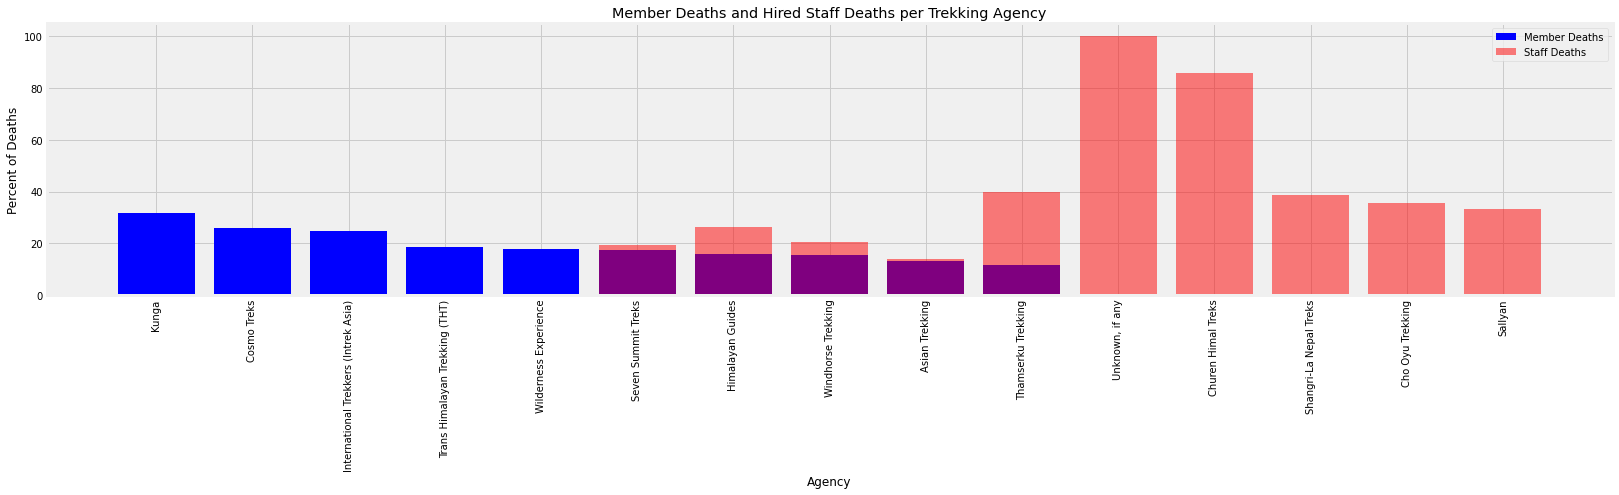

In [ ]:
plt.figure(figsize = (25, 5))
plt.bar(top_10_deaths_per_agency.index, top_10_deaths_per_agency["Percent of Deaths"] , color = "blue", label = "Member Deaths")
plt.bar(top10_staff_deaths_per_agency.index, top10_staff_deaths_per_agency["Percent of Deaths"], color = "red", alpha = .5, label = "Staff Deaths")
plt.title("Member Deaths and Hired Staff Deaths per Trekking Agency")
plt.xticks(rotation = 90)
plt.xlabel("Agency")
plt.ylabel("Percent of Deaths")
plt.legend();

*From this visualization, we can see that the Kunga Trekking company had the most member deaths compared to the other companies. All of the members that tried the expedition that was not a part of an agency did not make it back. We can infer from this observation that it is best to climb with an agency since the number of deaths per agency is relatively low.*

*Note: A noticeable trend is that there are way more percent of staff deaths than member deaths, and we should do more research to see if we can figure out why.*

*But for now, we wanted to see if the member deaths really did increase or decrease if there were hired staff on the expedition. That way, you know you could be more successful when you hire the experts to guide you!*

---
##### **Did member deaths increase/decrease if there were hired staff on the expedition?**

In [ ]:
staff_and_deaths = expeditions.groupby("hired_staff").sum()[["members", "member_deaths"]]

Text(0, 0.5, 'Member Death')

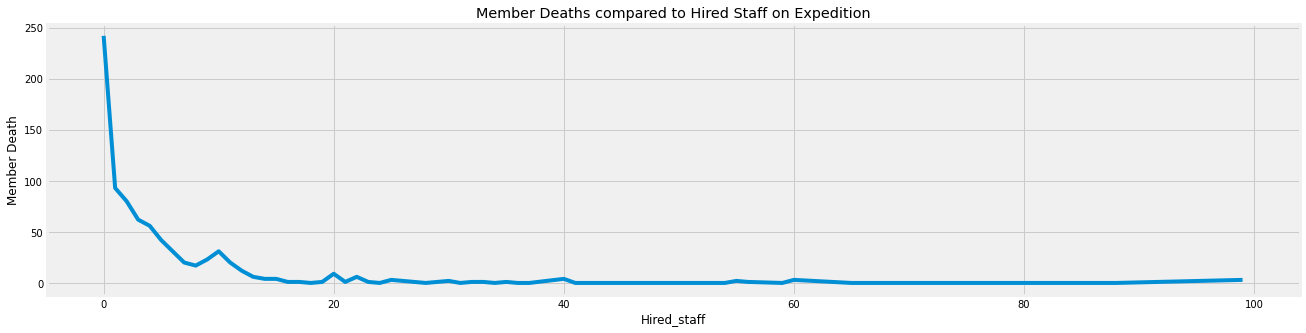

In [ ]:
plt.figure(figsize = (20, 5))
plt.plot(staff_and_deaths.index, staff_and_deaths["member_deaths"])
plt.title("Member Deaths compared to Hired Staff on Expedition")
plt.xlabel("Hired_staff")
plt.ylabel("Member Death")

*This visualization shows that the more staff on the expedition, the fewer member deaths. This realization shows that it is beneficial to have staff on an expedition: the more, the better. So anywhere between 18-40 for a reasonably large group and having around ten staff members will be beneficial for a smaller group. Simply having one staff member is more beneficial than zero.*

*Further, if having staff members is beneficial, is hiking during a different season helpful? Also, does gender play a role in successful climbs? That is what we looked at next:*

---
##### **Were there more successful termination reasons in a particular season?**

In [ ]:
success = expeditions[expeditions["termination_reason"] == "Success (main peak)"]
success_per_season = success.groupby("season").count()[["termination_reason"]].rename(columns = {"termination_reason" : "successful climbs"})
success_per_season

,successful climbs
season,
Autumn,2678
Spring,2722
Summer,40
Unknown,1
Winter,140


In [ ]:
success_per_season["total climbs"] = expeditions.groupby("season").count()[["peak_id"]]
success_per_season

,successful climbs,total climbs
season,,
Autumn,2678,5064
Spring,2722,4875
Summer,40,108
Unknown,1,2
Winter,140,315


In [ ]:
autumn_climbs = success_per_season["total climbs"].loc["Autumn"]
autumn_success = success_per_season["successful climbs"].loc["Autumn"]
Aper_succ = autumn_success / autumn_climbs * 100

spring_climbs = success_per_season["total climbs"].loc["Spring"]
spring_success = success_per_season["successful climbs"].loc["Spring"]
Sper_succ = spring_success / spring_climbs * 100

summer_climbs = success_per_season["total climbs"].loc["Summer"]
summer_success = success_per_season["successful climbs"].loc["Summer"]
Super_succ = summer_success / summer_climbs * 100

winter_climbs = success_per_season["total climbs"].loc["Winter"]
winter_success = success_per_season["successful climbs"].loc["Winter"]
Wper_succ = winter_success / winter_climbs * 100

In [ ]:
Alabels = '{:.2f}% Successful'.format(Aper_succ), '{:.2f}% Unsuccessful'.format(100 - Aper_succ)
Slabels = '{:.2f}% Successful'.format(Sper_succ), '{:.2f}% Unsuccessful'.format(100 - Sper_succ)
Sulabels = '{:.2f}% Unsuccessful'.format(100 - Super_succ), '{:.2f}% Successful'.format(Super_succ)
Wlabels = '{:.2f}% Unsuccessful'.format(100 - Wper_succ), '{:.2f}% Successful'.format(Wper_succ)

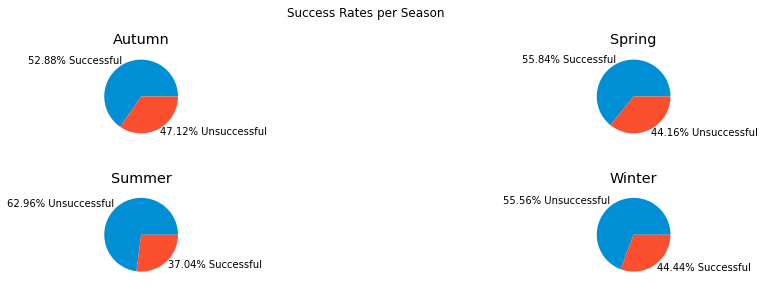

In [ ]:
plt.suptitle("Success Rates per Season", y = 1.05, x = 1)

plt.subplot(2,2,1)
plt.pie([autumn_climbs, autumn_success], labels = Alabels)
plt.title("Autumn")

plt.subplot(2,2,2)
plt.pie([spring_climbs, spring_success], labels = Slabels)
plt.title("Spring")

plt.subplot(2,2,3)
plt.pie([summer_climbs, summer_success], labels = Sulabels)
plt.title("Summer")

plt.subplot(2,2,4)
plt.pie([winter_climbs, winter_success], labels = Wlabels)
plt.title("Winter")

plt.subplots_adjust(left = 0.1,bottom = 0.1, right= 2, top = 0.9, wspace =.5, hspace =.5)

*This visualization shows us that Autumn and Spring are the better seasons to go on an expedition. They both have a 50+% success rate compared to summer and winter, with less than a 45% success rate. A possible reason for this is because winter is more disaster likely, so blizzards and colder weather are prominent. As for summer, since the temperature is pretty warmer or possibly warmer, it could lead to higher chances for avalanches. However, in this case, if you want to climb a mountain in the Himalayans, you should go in either spring or autumn!*

*Then, would being a male or female have an advantage? Look more below to see what we found.*

---
##### **Did more men or women successfully climb a peak?**

*After peeking (pun intended) at the data, it is evident that more men climbed a peak than women. There were roughly 26,000 men that completed a climb compared to only about 2300 women who completed their ascent. However, it is essential to look into the fact that there could be an overwhelming number of men who attempted to climb a peak compared to the number of women that tried to climb the peaks. We need to see the success rate of each gender, showing what percent of that gender successfully climbed a peak.*

In [ ]:
climbs = members.groupby("sex").count()[["success"]].rename(columns = {"success" : "Number of climbs"})
climbs

,Number of climbs
sex,
F,7044
M,69473


In [ ]:
total_females = climbs.loc['F']["Number of climbs"]
total_males = climbs.loc['M']["Number of climbs"]

In [ ]:
num_f_accomplished = len(members[(members["sex"] == "F") & (members["success"] == True)])
num_f_accomplished

2306

In [ ]:
num_m_accomplished = len(members[(members["sex"] == "M") & (members["success"] == True)])
num_m_accomplished

26891

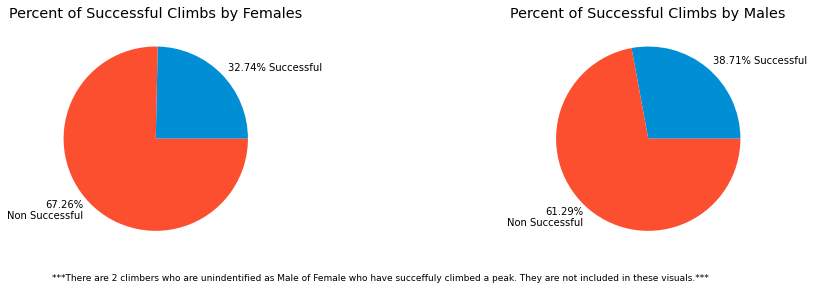

In [ ]:
f_values = '{:.2f}% Successful'.format(num_f_accomplished / total_females * 100), '{:.2f}%\nNon Successful'.format((total_females - num_f_accomplished)/ total_females * 100)
m_values = '{:.2f}% Successful'.format(num_m_accomplished / total_males * 100), '{:.2f}%\nNon Successful'.format((total_males - num_m_accomplished)/ total_males * 100)

#create pie chart of the percent of females that successfully climbed a peak
plt.subplot(1,2,1)
plt.pie([num_f_accomplished, total_females], labels = f_values)
plt.title("Percent of Successful Climbs by Females")

#create pie chart of the percent of males that successfully climbed a peak
plt.subplot(1,2,2)
plt.pie([num_m_accomplished, total_males], labels = m_values)
plt.title("Percent of Successful Climbs by Males")

#Set the spacing of the subplots
plt.subplots_adjust(left = 0.1,bottom = 0.1, right= 2, top = 0.9, wspace =.5, hspace =.5)
plt.figtext(1,.01, 
            "***There are 2 climbers who are unindentified as Male of Female who have succeffuly climbed a peak. They are not included in these visuals.***", 
            fontsize = 9,
            horizontalalignment='center');

*Looking at the proportions of the success rate of a climb per gender, we can see that both males and females have roughly the same chance of successfully climbing a peak. About 32% of females that attempted to climb a peak accomplished it, and about 38% of males accomplished their hike. With this information, we can see that any one gender does not have much of an advantage in successfully climbing a peak.*

*Taking a slight turn, though, we decided to look more into the age factor of success. Are we getting more technologically advanced/smarter with our hikes that older people can still hike and be successful on dangerous mountains?*

---
##### **How do the ages of hikers change over the years? Are there older hikers climbing more now or in the past?**

*Next, we took a little detour to explore a new type of graph and look at ages across the years.*

In [ ]:
years = members['year']
years.sort_values().unique()
years_list = [1930, 1950, 1970, 1990, 2010, 2019] #select some years to look closer at

ages = members[['age', 'year']]
ages = ages[ages['year'].isin(years_list)] #choose the rows only with those years

In [ ]:
#select counts for the ages, but also keep the year. These will help for plotting histogram-like graphs
ages2 = ages.groupby(['year', 'age']).agg({'age':'count'}).rename(columns={'age': 'count'}).reset_index()
ages2.head(5) 

,year,age,count
0,1930,23.0,1
1,1930,24.0,5
2,1930,26.0,1
3,1930,27.0,2
4,1930,28.0,1


In [ ]:
#creation of a ridgeline graph

#store each year's data in a dictionary
array_dict = {}
for year in years_list:
    array_dict[f'x_{year}'] = ages2[ages2['year']==year]['age']
    array_dict[f'y_{year}'] = ages2[ages2['year']==year]['count']
    array_dict[f'y_{year}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min())
#array_dict

#plot the traces on the graph for each year
fig = go.Figure()
for index, year in enumerate(years_list):
    fig.add_trace(go.Scatter(
                            x = [10, 80], y = np.full(2, len(years_list)- index),
                            mode =  'lines',
                            line_color = 'white'))
    
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{year}'],
                            y=array_dict[f'y_{year}'] + (len(years_list)-index) + 0.4,
                            fill='tonexty',
                            name=f'{year}'))
    
    fig.add_annotation(
                        x=10,
                        y=len(years_list)-index,
                        text=f'{year}',
                        showarrow=False,
                        yshift= 10)
    
fig.update_layout(
                title='Ages on Expeditions across several years',
                showlegend=False,
                xaxis=dict(title='Age'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )

fig.show()

*This is a ridgeline graph showing the distributions of ages across the years. Here we can see that the hikes in 1910 had people as young as 23 and as old as 50. It seems like the most common ages were 24 and 43 for that year. Whereas in 2010, hikes had hikers as young as 13 and up to 79 years old! But, most fell between 24 and 48 years old. Something interesting to note is that there were a lot of people in 1950 who were 51 years old, and then in 1970, the trend seemed to be that younger hikers were on expeditions (22-31 years). So, we can see a whole range of ages hike the Himalayas, which is probably not a factor of success.*

*So instead, we wanted to look at two more factors before concluding our research. First up, will a hiker have a better chance of being successful if they climb a specific mountain?*

---
##### **What peak had the highest sucess rate?**

In [ ]:
success = expeditions[expeditions["termination_reason"] == "Success (main peak)"]

In [ ]:
success_climbs = success.groupby("peak_name").count()[["peak_id"]].rename(columns = {"peak_id" : "successful climbs"})
success_climbs = success_climbs.sort_values("successful climbs")
success_climbs = success_climbs[success_climbs["successful climbs"] > 7]
success_climbs.tail(10)

,successful climbs
peak_name,
Kangchenjunga,112
Baruntse,117
Pumori,127
Makalu,153
Dhaulagiri I,160
Lhotse,245
Manaslu,313
Cho Oyu,832
Ama Dablam,926


In [ ]:
total_climbs = expeditions.groupby("peak_name").count()[["peak_id"]].rename(columns = {"peak_id" : "Total climbs"})
total_climbs = total_climbs.sort_values("Total climbs")
total_climbs = total_climbs[total_climbs["Total climbs"] > 7]
total_climbs.tail(10)

,Total climbs
peak_name,
Annapurna I,243
Pumori,265
Baruntse,308
Makalu,356
Dhaulagiri I,383
Lhotse,429
Manaslu,632
Cho Oyu,1332
Ama Dablam,1366


In [ ]:
peak_rate = (success_climbs["successful climbs"] / total_climbs["Total climbs"]).to_frame()
peak_rate = peak_rate.sort_values(0, ascending = False)
peak_rate = peak_rate.rename(columns = { 0 : "Success Rate"})
peak_rate = peak_rate[peak_rate["Success Rate"] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0, 0.5, 'Success Rate')

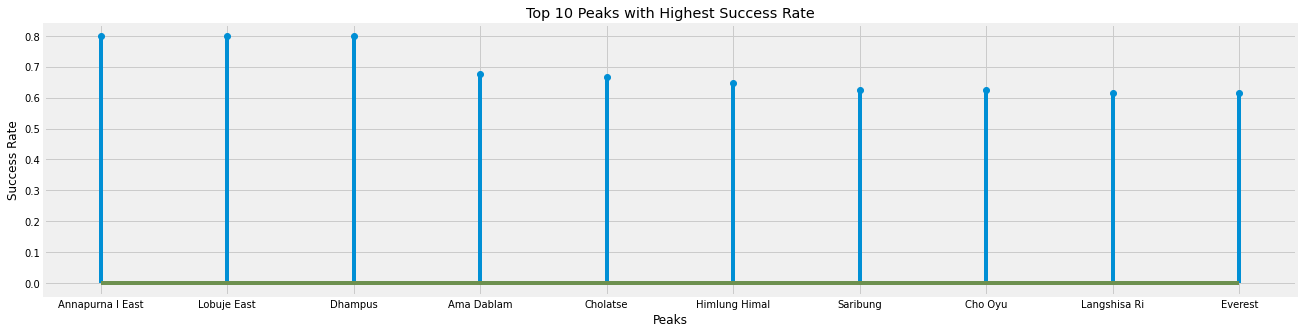

In [ ]:
plt.figure(figsize = (20, 5))
plt.stem(peak_rate.head(10).index, peak_rate["Success Rate"].head(10))
plt.title("Top 10 Peaks with Highest Success Rate")
plt.xlabel("Peaks")
plt.ylabel("Success Rate")

*This visualization shows the top 10 peaks with the highest success rate. We were surprised that Everest is not higher on the list, but it is still good to know it is on this list. It would be wise for a new climber to climb either Annapurna East, Laboje East, or Dhampus since they have one of the highest success rates.*

*Lastly, we looked at the violin distribution of successfully climbed peaks versus those that were either not even attempted or not completed. Will we find that the successful expeditions climbed higher peaks? Or are they all relatively the same?*

---
##### **Is there correlation between the height of peaks and climbing status?**

Text(0, 0.5, 'Peak Height')

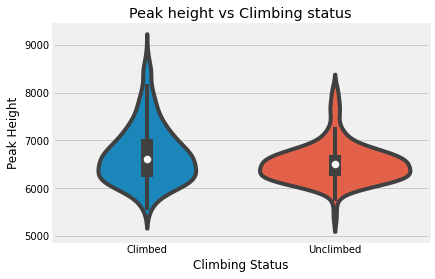

In [ ]:
sns.violinplot(x = peaks["climbing_status"], y = peaks["height_metres"])
plt.title("Peak height vs Climbing status")
plt.xlabel("Climbing Status")
plt.ylabel("Peak Height")

In [ ]:
peaks[peaks["climbing_status"] == "Unclimbed"]

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
10,APIW,Api West,NaN,7076,Unclimbed,NaN,NaN,NaN
37,DOGA,Dogari,NaN,6536,Unclimbed,NaN,NaN,NaN
41,DROM,Drohmo,"Domo, Longridge Peak",6881,Unclimbed,NaN,NaN,NaN
44,FIRN,Firnkopf,Firnkopf East,6730,Unclimbed,NaN,NaN,NaN
75,HNKU,Hongku Chuli,"Hunku Chuli, Pyramid Peak",6833,Unclimbed,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
455,LANY,Langtang Yubra,Yubra Himal,6048,Unclimbed,2018.0,"Australia, Netherands, Nepal",LANY18301
460,PEMR,Pemthang Ri,NaN,6743,Unclimbed,NaN,NaN,NaN
465,KORL,Korlang Pari Tippa,Korlang Pari Tippa North,5738,Unclimbed,NaN,NaN,NaN
466,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,NaN,NaN


*This visualization shows us that most of the climbed peaks were around 6000 - 7000 meters. This could show that this height is the prime height for when going on an expedition. However, the unsuccessful climbs/unclimbed were also in the 6000 - 7000 meter range, indicating that the height of a peak probably does not play a factor in the successfulness since there are so many other factors to consider.*


*This brings us to the end of our research. We discuss all essential findings in the next section.

---

## Conclusion

To summarize our findings, we found four main factors that play a role in a more successful climbing expedition.

1. Hire Staff.
> The more staff there is on an expedition, the fewer chances for an injury or death. Our research showed that having simply one staff member on the trip will significantly lower death cases than having zero.

2. Plan around the winter and summer.
> As one would infer, going on an expedition during winter is challenging, resulting in higher chances for injury or death. Our research confirms this inference and shows that not only is winter, not a good season, but also summer. We can see that summer has a 62% unsuccessful climbing rate, approximately 5% higher than winter's unsuccessful rate. We infer this is because the hotter temperatures result in more avalanches occurring and frequent falling.

3. Find the best peaks to climb.
> According to our research, we found the top 10 mountains with the highest success rate, and from it, we concluded that the best peaks to climb would be: Annapurna I East, Lobuje East, and Dhampus. All three of these peaks have an 80% success rate.


4. Age
> Finally, we wanted to highlight the effect of age. Interestingly enough, our research shows that generation does not significantly impact successful climbs as we would have thought initially. Although, it is more evidence that older people are attempting to go on expeditions today, and they are safely making it back. A possible reason for this is that more technologically advanced equipment allows for a more leisurely hike. Also, since most peaks have been climbed before, it is easier to follow an easy path up than trying to carve the way for a new one.


If we had more time and data, we would like to look into:
 * main illnesses for different age groups
 * required gear/gear used for various expeditions
 * length of expeditions
 * compare data with different peaks in another region
This would allow us to further our research and find more factors that will enable successful climbs. It would also allow us to cross-examine our data with data from another region to see if our elements are essential.